# I- Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Seaborn
import seaborn as sns
# sklearn
from sklearn import preprocessing

# xgboost n°1
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
#Performing grid search, Stratified K-fold CV: Hyperparameter tuning 
#from sklearn.model_selection import learning_curve, GridSearchCV, StratifiedKFold

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# SVM n°2
from sklearn.svm import SVC

# Random Forest n°3
from sklearn.ensemble import RandomForestClassifier
# KNN n°4
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree n°5
from sklearn.tree import DecisionTreeClassifier
# Logistic Regression n°6 
from sklearn.linear_model import LogisticRegression

# Accuracy alone is not enough n°7: Natual Random Gess
from sklearn.model_selection import cross_val_score # cross_validation
from sklearn.base import BaseEstimator 

# train test split
from sklearn.model_selection import train_test_split
# mertics to evaluate the model
from sklearn.model_selection import cross_val_predict

# Confusion Matrix --- for evaluating
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Scoring & metrics functions --- for evaluating
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# graphs
from sklearn.metrics import precision_recall_curve
# correct unbalanced dataset
from imblearn.over_sampling import SMOTE
#....................................
# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# Imputer SimpleImputer
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

# FeatureUnion
#from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# check missing value percentage *(Self Defined Package)
from missing_values_table import missing_values_table

# fill categoriacal missing values *(Self Defined Package)
from fill_missing import Categorical_Imputer

# Plot AUC *(Self Defined Package)
from roc_auc import roc_auc

# check missing value percentage *(Self Defined Package)
from missing_values_table import missing_values_table

# graphviz viz
from sklearn.tree import export_graphviz
# import dexplot % plot
import dexplot as dxp 
#JS viz https://arxiv.org/abs/1802.03888
#import shap

# II- Data Preparation

### 1- Load Data

In [2]:
# Path of the file to read
bankfile_path = "D:/Jupyter/Simplon/Projet_Final/FINAL/bank.csv"

In [3]:
# set display columns
pd.set_option('display.max_columns', 30)

In [4]:
# Read the file into a variable fifa_data
df = pd.read_csv(bankfile_path, parse_dates=True, sep = ';', encoding="utf-8", na_values = 'unknown')
df.rename(columns = lambda x: x.replace('.', '_'), inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Churn feature
df['Churn']= df['loan']
df.drop('loan',axis=1,inplace=True) # enlever la colonne loan

In [6]:
columns = df.columns.values.tolist()
print(columns)

['age', 'job', 'marital', 'education', 'default', 'housing', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'Churn']


In [7]:
# More detail abour the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp_var_rate    41188 non-null  float64
 15  cons_price_idx  41188 non-null  float64
 16  cons_conf_idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [8]:
df.nunique()

age                 78
job                 11
marital              3
education            7
default              2
housing              2
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
Churn                2
dtype: int64

#### Step 1: Check numeric features

In [9]:
# Exploratory Data Analysis : Numerical features
data_num = df.select_dtypes(exclude = ["bool_", "object_"])
data_num.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DEF6568208>,
      dtype=object)

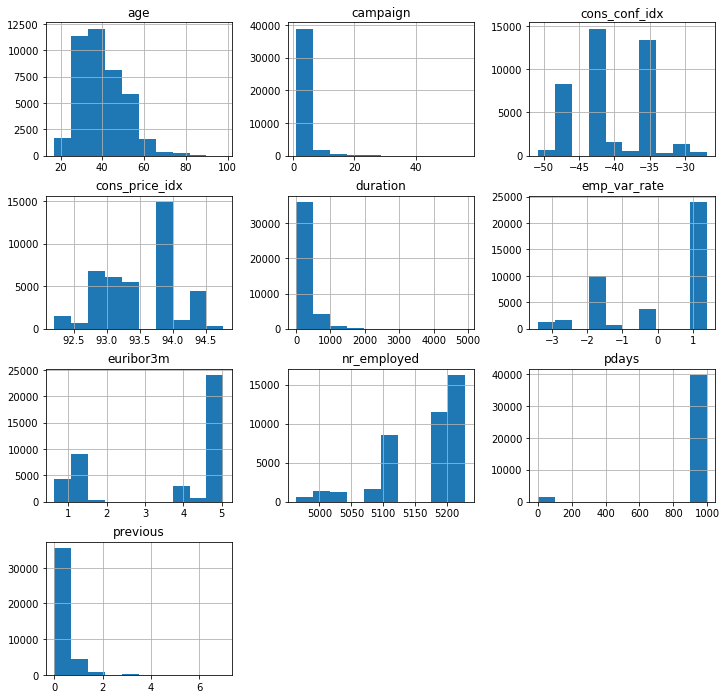

In [10]:
# See integer or real variables (continuous or discrete)
data_num[data_num.dtypes[(data_num.dtypes=="float64")|(data_num.dtypes=="int64")]
                                    .index.values].hist(figsize=[12,12])

#### Step 2: Categorical Feature Unique Values

In [11]:
# Exploratory Data Analysis : Categorical features
data_cat = df.select_dtypes(exclude = ["number", "bool_", "float_"])
data_cat.head()

,job,marital,education,default,housing,contact,month,day_of_week,poutcome,y,Churn
0,housemaid,married,basic.4y,no,no,telephone,may,mon,nonexistent,no,no
1,services,married,high.school,NaN,no,telephone,may,mon,nonexistent,no,no
2,services,married,high.school,no,yes,telephone,may,mon,nonexistent,no,no
3,admin.,married,basic.6y,no,no,telephone,may,mon,nonexistent,no,no
4,services,married,high.school,no,no,telephone,may,mon,nonexistent,no,yes


D:\Users\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


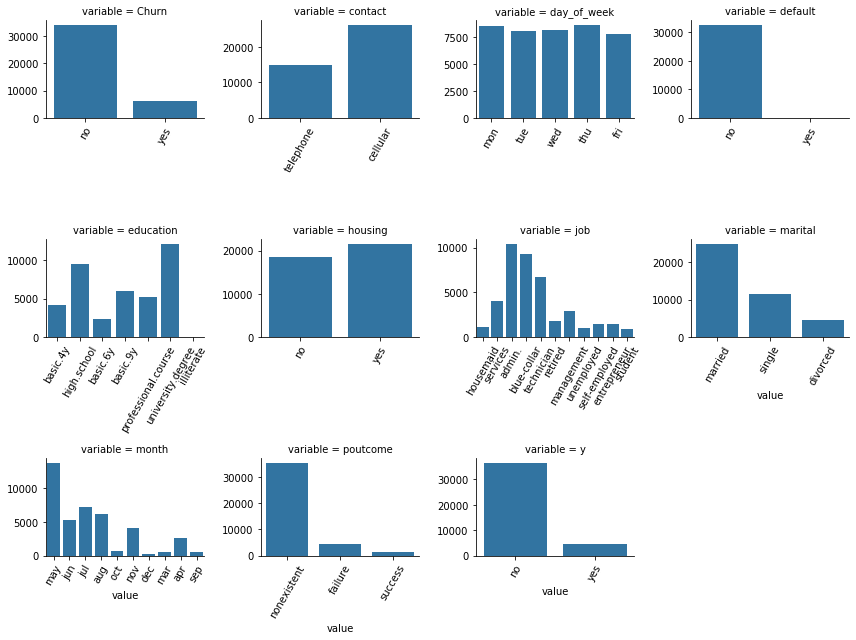

In [12]:
f = pd.melt(df, value_vars = sorted(data_cat))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex =False, sharey =False)
plt.xticks(rotation = 'vertical')
g=g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

#### Step 3: Churn proportion

In [13]:
# convert categorical target to numerical:" y --- has the client credit default? (binary: "yes","no")""
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='yes' else 0)

In [14]:
# show the head of df['class']
df['Churn'].head()

0    0
1    0
2    0
3    0
4    1
Name: Churn, dtype: int64

In [15]:
# show the head of df['class']
df['Churn'].value_counts()

0    34940
1     6248
Name: Churn, dtype: int64

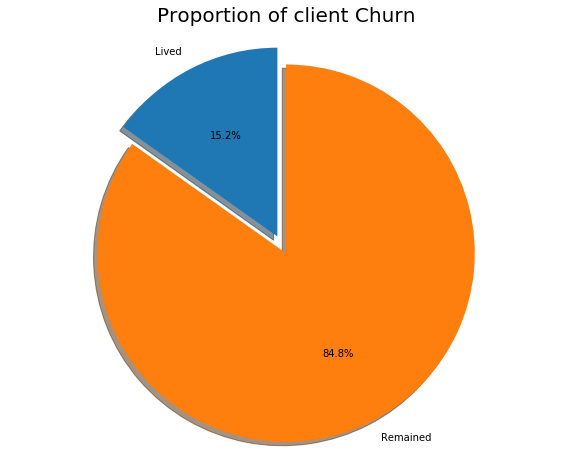

In [16]:
labels = 'Lived', 'Remained'
sizes = [df.Churn[df['Churn']==1].count(), df.Churn[df['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of client Churn", size = 20)
plt.show()

### 2- Data Transformation

In [17]:
# X and y
X = df.drop(columns=['Churn'])
y1= df['Churn']

#### Step 1: Check missing value percentage

In [18]:
# missing value table
missing_values_table(df)

Your slelected dataframe has 21 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
default,8597,20.87
education,1731,4.20
housing,990,2.40
job,330,0.80
marital,80,0.19


In [19]:
# missing value table
missing_values_table(X)

Your slelected dataframe has 20 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
default,8597,20.87
education,1731,4.20
housing,990,2.40
job,330,0.80
marital,80,0.19


#### Step 2: Handle missing values

###### a- Define numerical simpleimputer: strategy='median'

In [20]:
# define numerical simpleimputer
num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

##### b- Strategy apply to numerical columns

In [21]:
# numerical columns
num_cols = ['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']

In [22]:
# imputing on numerical data
X[num_cols] = num_imputer.fit_transform(X[num_cols])

##### c- Define categorical imputer strategy

In [23]:
# define categorical imputer
cate_imputer = Categorical_Imputer('most_frequent')

##### d- Strategy apply to categorical features

In [24]:
# Define categorical columns
cate_cols = X.columns.drop(num_cols)
# display categorical columns
cate_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [25]:
'''
# categorical columns
categ_cols = cate_cols.drop('Churn')
# display categorical columns
categ_cols
'''

"\n# categorical columns\ncateg_cols = cate_cols.drop('Churn')\n# display categorical columns\ncateg_cols\n"

In [26]:
# imputing on categorical data
X[cate_cols] = cate_imputer.fit_transform(X[cate_cols])

##### e- Checking the data

In [27]:
# check the number of unique values
df[cate_cols].apply(lambda x: x.nunique(), axis=0)

job            11
marital         3
education       7
default         2
housing         2
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [28]:
# OK! df['marital'],
X['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

##### f- Define strategies apply to dataset

In [29]:
# missing value table
missing_values_table(X)

Your slelected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### 3- ML models

#### A- Umbalanced dataset

#### Step 1: Split dataset in features and target variable

In [30]:
# Split dataset in features and target variable
X = df.drop(columns=['Churn']); 
y1= df['Churn']
y1.value_counts()

0    34940
1     6248
Name: Churn, dtype: int64

#### Step 2: Get dummies,turn categorical feature into numerical values

In [31]:
X.shape

(41188, 20)

In [32]:
# Turn categorical feature into numerical values
X_convert = pd.get_dummies(X, prefix_sep='_', drop_first=True)
# X head
X_convert.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


#### Step 3: Split into training and testing sets

In [33]:
# split X and y into training and testing sets: 80% for training and 20% for model testing---
x0_train, x0_test, y0_train, y0_test=train_test_split(X_convert, y1,test_size=0.20,random_state=42)

#### Step 4: Logistic Regression model

In [34]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [35]:
# fit the model with data
logreg.fit(x0_train,y0_train)
#Predict Class Labels
y0_pred=logreg.predict(x0_test)

C:\Users\kodjo.toblome\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
#Confusion Matrix
print(metrics.confusion_matrix(y0_test, y0_pred))

[[6994    0]
 [1244    0]]


In [37]:
#Classification Report
print(metrics.classification_report(y0_test, y0_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6994
           1       0.00      0.00      0.00      1244

    accuracy                           0.85      8238
   macro avg       0.42      0.50      0.46      8238
weighted avg       0.72      0.85      0.78      8238



C:\Users\kodjo.toblome\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print("Score Train -->", round(logreg.score(x0_train,y0_train) *100,2), " %")

Score Train --> 84.81  %


In [39]:
#Model Accuracy
print("Score Test -->",  round(logreg.score(x0_test,y0_test)*100,2), " %")

Score Test --> 84.9  %


### B- Balanced dataset "Target variable y with SMOTE"

#### Step 1: Smote for target y_sm

In [40]:
# smote parameters: k_neighbors is number of nearest neighbours to used to construct synthetic samples.
# n_neighbors is the number of nearest neighbours to use to determine if a minority sample is in danger.
oversamp=SMOTE(sampling_strategy='auto',k_neighbors=2)
X_sm, y_sm = oversamp.fit_sample(X_convert, y1)

#### Step 2:  Standardize

In [41]:
scaler = preprocessing.StandardScaler()
X_scale= scaler.fit_transform(X_sm)

#### Step 3: Models

##### a- xgboost

In [42]:
skfolds = StratifiedKFold(n_splits =10)
xgb_clf = XGBClassifier()
# X feature set and y Target set
xgb_accuracy = []
for train_index, test_index in skfolds.split(X_scale, y_sm):
    clone_clf = clone(xgb_clf)
    X_train_folds = X_scale[train_index]
    y_train_folds = (y_sm[train_index])
    X_test_fold   = X_scale[test_index]
    y_test_fold   = (y_sm[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred_xg = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred_xg == y_test_fold)
    xgb_accuracy.append(n_correct/ len(y_pred_xg))
    print("Results for xgboost algorithm is", n_correct/ len(y_pred_xg))
    
xgbmodel_accuracy = round(np.array(xgb_accuracy).max()*100,2)
print("xgboost Model Accuracy -->", xgbmodel_accuracy, " %")     

Results for xgboost algorithm is 0.46150543789353177
Results for xgboost algorithm is 0.4758156840297653
Results for xgboost algorithm is 0.5125930165998855
Results for xgboost algorithm is 0.7421293646250715
Results for xgboost algorithm is 0.6983400114481969
Results for xgboost algorithm is 0.6677160847166571
Results for xgboost algorithm is 0.5824270177447052
Results for xgboost algorithm is 0.5977389811104751
Results for xgboost algorithm is 0.5479393245563824
Results for xgboost algorithm is 0.4720950200343446
xgboost Model Accuracy --> 74.21  %


###### *** Model evaluation: xgboost ***

##### - Confusion Matrix

In [43]:
# Confusion matrix for the best model
y_pred = cross_val_predict(xgb_clf,X_scale, y_sm, cv = 10)
confusion_matrix(y_sm,y_pred)

array([[12640, 22300],
       [ 7341, 27599]], dtype=int64)

##### - Classification Report

In [44]:
#Classification Report
print(classification_report(y_sm, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.36      0.46     34940
           1       0.55      0.79      0.65     34940

    accuracy                           0.58     69880
   macro avg       0.59      0.58      0.56     69880
weighted avg       0.59      0.58      0.56     69880



##### b- SVM

In [45]:
svc_clf = SVC(kernel = 'rbf', random_state = 50, probability = True)

# X feature set and y Target set
svm_accuracy = []
for train_index, test_index in skfolds.split(X_scale, y_sm):
    clone_clf = clone(svc_clf)
    X_train_folds_svm = X_scale[train_index]
    y_train_folds_svm = (y_sm[train_index])
    X_test_fold_svm   = X_scale[test_index]
    y_test_fold_svm   = (y_sm[test_index])
    clone_clf.fit(X_train_folds_svm, y_train_folds_svm)
    y_pred_svm = clone_clf.predict(X_test_fold_svm)
    n_correct = sum(y_pred_svm == y_test_fold_svm)
    svm_accuracy.append(n_correct/ len(y_pred_svm))
    print("Results for SVM algorithm is", n_correct/ len(y_pred_svm))
    
svmmodel_accuracy = round(np.array(svm_accuracy).max()*100,2)
print("SVM Model Accuracy -->", svmmodel_accuracy, " %")      

Results for SVM algorithm is 0.49084144247281053
Results for SVM algorithm is 0.5612478534630796
Results for SVM algorithm is 0.5562392673153979
Results for SVM algorithm is 0.7578706353749285
Results for SVM algorithm is 0.9129937034917001
Results for SVM algorithm is 0.7388380080137379
Results for SVM algorithm is 0.5768460217515742
Results for SVM algorithm is 0.8345735546651403
Results for SVM algorithm is 0.8401545506582713
Results for SVM algorithm is 0.49084144247281053
SVM Model Accuracy --> 91.3  %


##### c- Random Forest

In [46]:
rf_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# X feature set and y Target set
rf_accuracy = []
for train_index, test_index in skfolds.split(X_scale, y_sm):
    clone_clf = clone(rf_clf)
    X_train_folds = X_scale[train_index]
    y_train_folds = (y_sm[train_index])
    X_test_fold   = X_scale[test_index]
    y_test_fold   = (y_sm[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    rf_accuracy.append(n_correct/ len(y_pred))
    print("Results for Random Forest algorithm is", n_correct/ len(y_pred))
rfmodel_accuracy = round(np.array(rf_accuracy).max()*100,2)
print("Random Forest Model Accuracy -->", rfmodel_accuracy, " %")

Results for Random Forest algorithm is 0.4813966800228964
Results for Random Forest algorithm is 0.43488838008013736
Results for Random Forest algorithm is 0.5140240412135089
Results for Random Forest algorithm is 0.6400973096737264
Results for Random Forest algorithm is 0.6647109330280481
Results for Random Forest algorithm is 0.5712650257584431
Results for Random Forest algorithm is 0.5605323411562679
Results for Random Forest algorithm is 0.5746994848311391
Results for Random Forest algorithm is 0.5163136805953062
Results for Random Forest algorithm is 0.4977103606182026
Random Forest Model Accuracy --> 66.47  %


##### d- k-nn

In [47]:
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# X feature set and y Target set
knn_accuracy = []
for train_index, test_index in skfolds.split(X_scale, y_sm):
    clone_clf = clone(knn_clf)
    X_train_folds = X_scale[train_index]
    y_train_folds = (y_sm[train_index])
    X_test_fold   = X_scale[test_index]
    y_test_fold   = (y_sm[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    knn_accuracy.append(n_correct/ len(y_pred))
    print("Results for KNN algorithm is", n_correct/ len(y_pred))
knnmodel_accuracy = round(np.array(knn_accuracy).max()*100,2)
print("KNN Model Accuracy -->", knnmodel_accuracy, " %") 

Results for KNN algorithm is 0.499141385231826
Results for KNN algorithm is 0.5586720091585575
Results for KNN algorithm is 0.5894390383514596
Results for KNN algorithm is 0.7459931310818546
Results for KNN algorithm is 0.86949055523755
Results for KNN algorithm is 0.7624499141385231
Results for KNN algorithm is 0.6104751001717229
Results for KNN algorithm is 0.8103892386949055
Results for KNN algorithm is 0.8281339439038351
Results for KNN algorithm is 0.5997424155695478
KNN Model Accuracy --> 86.95  %


##### e- Decision Tree

In [48]:
dt_clf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)

# X feature set and y Target set
dt_accuracy = []
for train_index, test_index in skfolds.split(X_scale, y_sm):
    clone_clf = clone(dt_clf)
    X_train_folds = X_scale[train_index]
    y_train_folds = (y_sm[train_index])
    X_test_fold   = X_scale[test_index]
    y_test_fold   = (y_sm[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    dt_accuracy.append(n_correct/ len(y_pred))
    print("Results for Decision Tree algorithm is", n_correct/ len(y_pred))
    
dtmodel_accuracy = round(np.array(dt_accuracy).max()*100,2)
print(" Decision Tree Model Accuracy -->", dtmodel_accuracy, " %")

Results for Decision Tree algorithm is 0.4315970234688037
Results for Decision Tree algorithm is 0.34602175157412707
Results for Decision Tree algorithm is 0.5164567830566685
Results for Decision Tree algorithm is 0.6000286204922725
Results for Decision Tree algorithm is 0.5914424728105323
Results for Decision Tree algorithm is 0.5870062965082999
Results for Decision Tree algorithm is 0.5380652547223812
Results for Decision Tree algorithm is 0.565254722381225
Results for Decision Tree algorithm is 0.5266170578133944
Results for Decision Tree algorithm is 0.5088723526044648
 Decision Tree Model Accuracy --> 60.0  %


##### f- Logistic regression

In [49]:
log_clf = LogisticRegression(random_state =50)

# X feature set and y Target set
log_accuracy = []
for train_index, test_index in skfolds.split(X_scale, y_sm):
    clone_clf = clone(log_clf)
    X_train_folds = X_scale[train_index]
    y_train_folds = (y_sm[train_index])
    X_test_fold   = X_scale[test_index]
    y_test_fold   = (y_sm[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    log_accuracy.append(n_correct/len(y_pred))
    print("Results for Logistic Regression algorithm is", n_correct/ len(y_pred))
    
    
logmodel_accuracy = round(np.array(log_accuracy).max()*100,2)
print("Logistic Regression Model Accuracy is -->", logmodel_accuracy, " %")

Results for Logistic Regression algorithm is 0.4733829421866056
Results for Logistic Regression algorithm is 0.5040068689181454
Results for Logistic Regression algorithm is 0.6851745850028621
Results for Logistic Regression algorithm is 0.7756153405838581
Results for Logistic Regression algorithm is 0.8938179736691471
Results for Logistic Regression algorithm is 0.7856325128792215
Results for Logistic Regression algorithm is 0.746994848311391
Results for Logistic Regression algorithm is 0.8003720663995421
Results for Logistic Regression algorithm is 0.8830852890669719
Results for Logistic Regression algorithm is 0.5583858042358328
Logistic Regression Model Accuracy is --> 89.38  %


C:\Users\kodjo.toblome\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### i- Natural Guess

In [50]:
# X feature set and y Target set

class NoChurn(BaseEstimator):
    
    def fit(self, X_scale, y_sm=None):
        pass
    def predict(self, X_scale):
        return np.zeros((len(X_scale), 1), dtype =bool)# predict zeros ie no Churn at all
No_Churn = NoChurn()
accur= cross_val_score(No_Churn, X_scale, y_sm, cv =10, scoring ="accuracy")

nrgmodel_accuracy = round(np.array(accur).max()*100,2)
print("Natual Random Gess Accuracy is-->", nrgmodel_accuracy, " %")

Natual Random Gess Accuracy is--> 86.19  %


#### Step 4: Machine Learning Algorithm Evaluation

##### a- Summary

In [51]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Xgboost', 'Random Forest','Support Vector Machine','K-Nearest Neighbor', 'Logistic Regression',' Natual Random Gess',
              'Decision Tree'],
    'Score': [xgbmodel_accuracy, rfmodel_accuracy, svmmodel_accuracy, knnmodel_accuracy, logmodel_accuracy, nrgmodel_accuracy,
dtmodel_accuracy]
                              })
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,91.30,Support Vector Machine
1,89.38,Logistic Regression
2,86.95,K-Nearest Neighbor
3,86.19,Natual Random Gess
4,74.21,Xgboost
5,66.47,Random Forest
6,60.00,Decision Tree


##### b- SVM Classification report

In [71]:
#Split the data into training set (80%) and test set (20%)
#from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scale, y_sm, test_size=0.20, random_state=50)

In [72]:
#Fit the Support Vector Machine Model
svcmodel = SVC(kernel='rbf', random_state=50, probability=True)
svcmodel.fit(X_train1,y_train1)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test1)
#svc_pred

In [69]:
print("Score Train -->", round(svcmodel.score(X_train1,y_train1) *100,2), " %")

Score Train --> 86.41  %


In [70]:
#Model Accuracy
print("Score Test -->",  round(svcmodel.score(X_test1,y_test1)*100,2), " %")

Score Test --> 85.99  %


In [73]:
#Calculate Precision, Recall and F1-Score
#from sklearn.metrics import classification_report
print(classification_report(y_test1, svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6999
           1       0.93      0.78      0.85      6977

    accuracy                           0.86     13976
   macro avg       0.87      0.86      0.86     13976
weighted avg       0.87      0.86      0.86     13976



##### c- SVM confusion matrix

In [74]:
#Generate confusion matrix
#from sklearn.metrics import confusion_matrix
conf_mat_svc = confusion_matrix(y_test1, svc_pred)
conf_mat_svc

array([[6611,  388],
       [1559, 5418]], dtype=int64)

##### d- SVM AUC-ROC curve

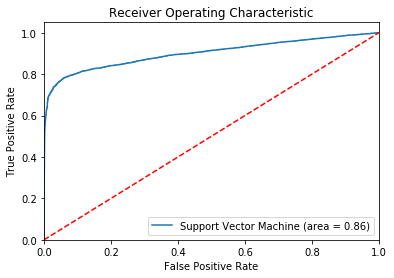

In [75]:
#Generate AUC-ROC curve
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
svc_roc_auc = roc_auc_score(y_test1, svcmodel.predict(X_test1))
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test1, svcmodel.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr_svc, tpr_svc, label='Support Vector Machine (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()